## Name: Hamna Ashraf
### Student ID: 8826836
### Lab 4

#### Required libraries:

In [618]:
import numpy as np
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import PolynomialFeatures
import seaborn as sns
from sklearn.pipeline import Pipeline
from typing import List


#### 1. Getting the data:

In [619]:
diabetes = datasets.load_diabetes(as_frame=True, scaled=False) #the data is scaled as mentioned in description
data, target = diabetes.data, diabetes.target
data['target'] = target


#### 2.Describe, explore and provide insights

In [620]:
data.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000
mean,48.518100,1.468326,26.375792,94.647014,189.140271,115.439140,49.788462,4.070249,4.641411,91.260181,152.133484
std,13.109028,0.499561,4.418122,13.831283,34.608052,30.413081,12.934202,1.290450,0.522391,11.496335,77.093005
min,19.000000,1.000000,18.000000,62.000000,97.000000,41.600000,22.000000,2.000000,3.258100,58.000000,25.000000
25%,38.250000,1.000000,23.200000,84.000000,164.250000,96.050000,40.250000,3.000000,4.276700,83.250000,87.000000
50%,50.000000,1.000000,25.700000,93.000000,186.000000,113.000000,48.000000,4.000000,4.620050,91.000000,140.500000
75%,59.000000,2.000000,29.275000,105.000000,209.750000,134.500000,57.750000,5.000000,4.997200,98.000000,211.500000
max,79.000000,2.000000,42.200000,133.000000,301.000000,242.400000,99.000000,9.090000,6.107000,124.000000,346.000000


The histogram shows us if the data is normally distributed

<Axes: xlabel='bmi', ylabel='Count'>

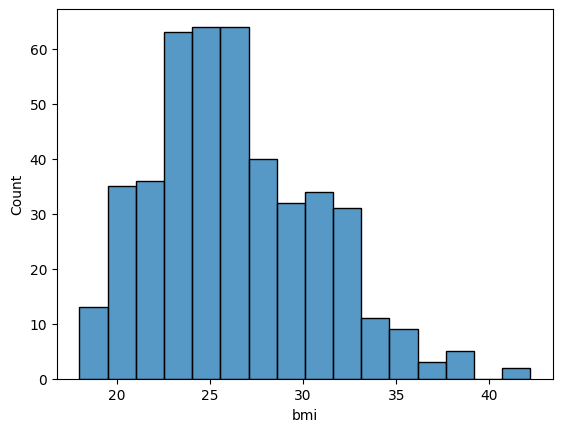

In [621]:
sns.histplot(data=data, x= data['bmi'])

From the graph below we can see that the correlation between bmi and target is almost 0.59. So we know that they are not strongly but moderately related.

<Axes: >

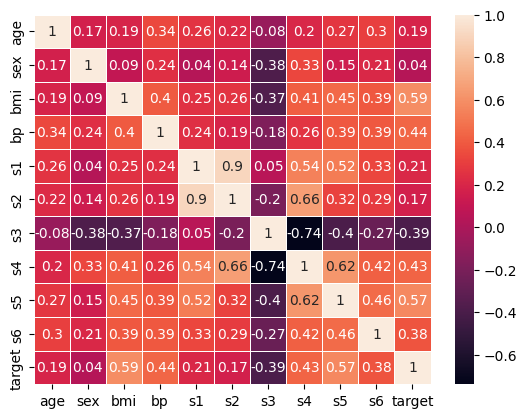

In [622]:
corr_values = data.corr().round(2)
sns.heatmap(corr_values, annot=True, linewidth=.5)

#### 4. Clean data:
The data we have does not need to be cleaned further. It is because there are no outliers we need to remove and the distribution is also normal. There are no null values in the data too  

Checking for outliers in the data. There are no outliers that are too much out of normal range

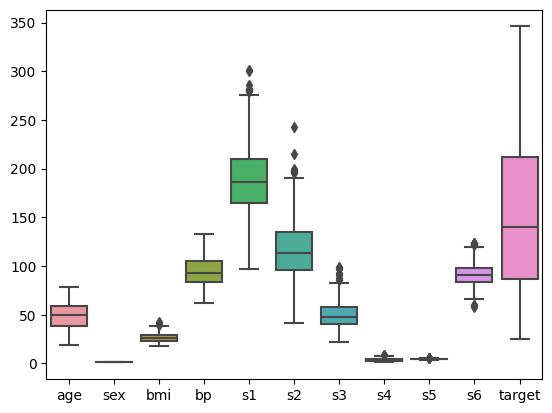

In [623]:
sns.boxplot(diabetes.data)
plt.show()

In [624]:
data.info() #no missing data


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


#### 5. Splitting the data:

In [625]:
#Splitting data into training and testing 
X_train, X_temp, y_train, y_temp = train_test_split(data, target, test_size=0.3, random_state=0) #70% training data , 30% remaining
#30% split into 15% each for validation and test data
X_validate, X_test, y_validate, y_test = train_test_split(X_temp, y_temp, test_size = 0.5, random_state=0) 



#### 6. Applying Polynomial Regression: (degree 0-5)

In [626]:
def create_polynomial_models(X: np.ndarray, y: np.ndarray, degrees: List[int]) -> dict[int, np.poly1d]:
    """
    Creates polynomial models for the given degrees and fits them to the given data.

    Args
        X: The x values of the data.
        y: The y values of the data.
        degrees: A list of polynomial degrees to try.

    Returns:
        A dictionary of polynomial models, with the polynomial degree as the key.
    """

    models = {}
    for degree in degrees:
        model = Pipeline([('polynomial', PolynomialFeatures(degree=degree)),
                          ('linear', LinearRegression())])
        model.fit(X, y)
        models[degree] = model
    return models

In [627]:
X_train_reshaped = X_train['bmi'].values.reshape(-1, 1)
degrees = list(range(0, 6))
models = create_polynomial_models(X_train_reshaped.reshape(-1, 1), y_train, degrees)

models

{0: Pipeline(steps=[('polynomial', PolynomialFeatures(degree=0)),
                 ('linear', LinearRegression())]),
 1: Pipeline(steps=[('polynomial', PolynomialFeatures(degree=1)),
                 ('linear', LinearRegression())]),
 2: Pipeline(steps=[('polynomial', PolynomialFeatures()),
                 ('linear', LinearRegression())]),
 3: Pipeline(steps=[('polynomial', PolynomialFeatures(degree=3)),
                 ('linear', LinearRegression())]),
 4: Pipeline(steps=[('polynomial', PolynomialFeatures(degree=4)),
                 ('linear', LinearRegression())]),
 5: Pipeline(steps=[('polynomial', PolynomialFeatures(degree=5)),
                 ('linear', LinearRegression())])}

#### Plotting models with training data:

In [628]:
def plot_multiple_models(X, y, models):
    # Calculate the number of rows and columns for the subplots
    X_continuous = np.linspace(min(X), max(X), X.shape[0])
    n_plots = len(models)
    n_cols = int(np.ceil(np.sqrt(n_plots)))
    n_rows = int(np.ceil(n_plots / n_cols))
    fig, axs = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(6, 6))
    fig.tight_layout(pad=3.0)
    axs = axs.flatten()
    for i, (name, model) in enumerate(models.items()):
        axs[i].scatter(X, y, s=20, edgecolor="black", c="darkorange", label="data")
        axs[i].plot(X_continuous, model.predict(X_continuous), label=f"Model={name}", linewidth=2)
        axs[i].set_xlabel("bmi")
        axs[i].set_ylabel("target")
        axs[i].set_title(f"Model={name}")
    plt.show()

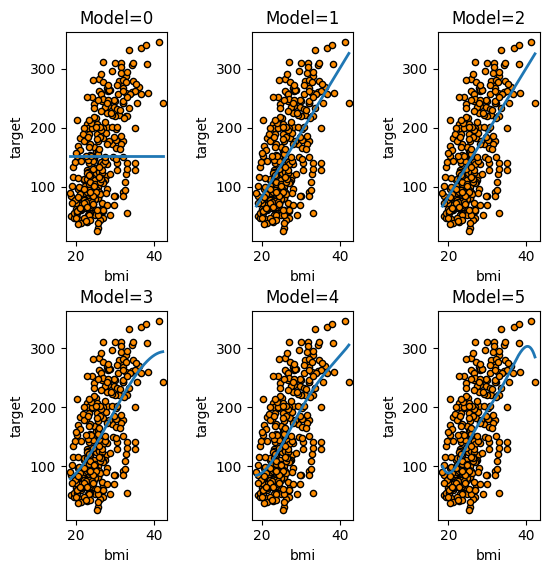

In [629]:
plot_multiple_models(X_train_reshaped, y_train, models)

#### Plotting models with validate data

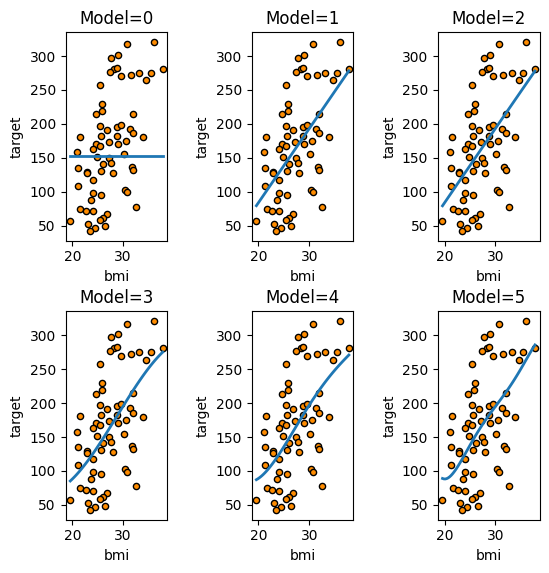

In [630]:
X_validate_reshaped = X_validate['bmi'].values.reshape(-1, 1)
plot_multiple_models(X_validate_reshaped, y_validate, models)

#### 7. Compare the models:

__R^2:__

In [631]:
from sklearn.metrics import mean_absolute_error

trained_r2_values = []
validate_r2_values = []
for degree, model in models.items():
    r_2_train = round(model.score(X_train_reshaped, y_train), 5)
    trained_r2_values.append(r_2_train)

    r_2_validate = round(model.score(X_validate_reshaped, y_validate), 5)
    validate_r2_values.append(r_2_validate)

print(f'Training R^2 for models 0-5: {trained_r2_values}')

print('\n')

print(f'Validate R^2 for models 0-5: {validate_r2_values}')

Training R^2 for models 0-5: [0.0, 0.38078, 0.38078, 0.38299, 0.3834, 0.38545]


Validate R^2 for models 0-5: [-0.03664, 0.2967, 0.29674, 0.29216, 0.29361, 0.3031]


__MAE:__

In [632]:
trained_mae_values = []
validate_mae_values = []

for degree, model in models.items():
    mae_trained = round(mean_absolute_error(model.predict(X_train_reshaped), y_train),5)
    trained_mae_values.append(mae_trained)

    mae_validate = round(mean_absolute_error(model.predict(X_validate_reshaped), y_validate),5)
    validate_mae_values.append(mae_validate)

print(f'Training MAE for models 0-5: {trained_mae_values}')

print('\n')

print(f'Validate MAE for models 0-5: {validate_mae_values}')

Training MAE for models 0-5: [68.44631, 51.71205, 51.71254, 51.43655, 51.38314, 51.3017]


Validate MAE for models 0-5: [63.82245, 52.69394, 52.70206, 52.94222, 53.10668, 52.60579]


__MAPE:__

In [633]:
def calculate_mape(y, y_predicted):

    y, y_predicted = np.array(y), np.array(y_predicted)
    
    ape = np.abs((y - y_predicted) / y)      
    mape = np.mean(ape)
    
    return mape

trained_mape_values = []
validate_mape_values = []
for degree, model in models.items():
    mape_trained = round(calculate_mape(y_train, model.predict(X_train_reshaped)),5)
    trained_mape_values.append(mape_trained)

    mape_validate = round(calculate_mape(y_validate, model.predict(X_validate_reshaped)),5)
    validate_mape_values.append(mape_validate)


print(f'Training MAPE for models 0-5: {trained_mape_values}')

print('\n')

print(f'Validate MAPE for models 0-5: {validate_mape_values}')

Training MAPE for models 0-5: [0.65451, 0.48175, 0.48176, 0.47889, 0.47789, 0.47727]


Validate MAPE for models 0-5: [0.51895, 0.44593, 0.44604, 0.44546, 0.4462, 0.44535]


In [634]:
import pandas as pd

final_result = {
    "Train R^2" : trained_r2_values,
    "Validate R^2" : validate_r2_values,
    "Train MAE" : trained_mae_values,
    "Validate MAE" : validate_mae_values,
    "Train MAPE" : trained_mape_values,
    "Validate MAPE" : validate_mape_values,
}

tb = pd.DataFrame(final_result, index = degrees)
tb

,Train R^2,Validate R^2,Train MAE,Validate MAE,Train MAPE,Validate MAPE
0,0.00000,-0.03664,68.44631,63.82245,0.65451,0.51895
1,0.38078,0.29670,51.71205,52.69394,0.48175,0.44593
2,0.38078,0.29674,51.71254,52.70206,0.48176,0.44604
3,0.38299,0.29216,51.43655,52.94222,0.47889,0.44546
4,0.38340,0.29361,51.38314,53.10668,0.47789,0.44620
5,0.38545,0.30310,51.30170,52.60579,0.47727,0.44535


#### 7.2: Conclusion

By analyzing the values for all R^2, MAE and MAPE in table tb we select model 5. \
Reason: 
- Consider R^2 values, for model 5. Compared to other models both train and validate values are greater which means that it is better. More it is closer to 1, greater fit it is

- If we consider values for MAE and MAPE, the values for both training and validation data is less than the others. We want the model that minimizes the error. 

Therefore we choose model 5

#### 7.2.1: Chosen model on test set:

In [635]:
model_5 = models[5]
X_test_reshaped = X_test['bmi'].values.reshape(-1, 1)

In [636]:
r_2_test = round(model_5.score(X_test_reshaped, y_test), 5)
mae_test = round(mean_absolute_error(model_5.predict(X_test_reshaped), y_test),5)
mape_test = round(calculate_mape(y_test, model_5.predict(X_test_reshaped)),5)

print(f"R^2_test: {r_2_test}\nMAE_test: {mae_test}\nMAPE_test: {mape_test}")


R^2_test: 0.0544
MAE_test: 48.58307
MAPE_test: 0.47008


#### 7.2.2 Plots of test, train and validation sets

In [637]:
def plot_model(X, y, model):
    # Calculate the number of rows and columns for the subplots
    X_continuous = np.linspace(min(X), max(X), X.shape[0])
    fig, ax = plt.subplots()
    ax.scatter(X, y, s=20, edgecolor="black", c="darkorange", label="data")
    ax.plot(X_continuous, model.predict(X_continuous), label="Model", linewidth=2)
    ax.set_xlabel("bmi")
    ax.set_ylabel("target")

Text(0.5, 1.0, 'Test Plot')

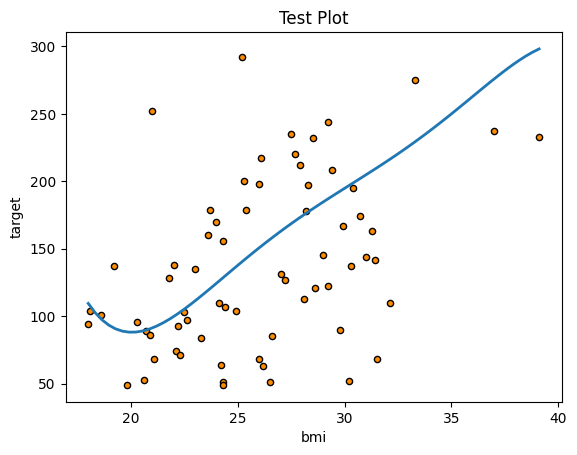

In [638]:
plot_model(X_test_reshaped, y_test, model_5)
plt.title("Test Plot")

Text(0.5, 1.0, 'Training plot')

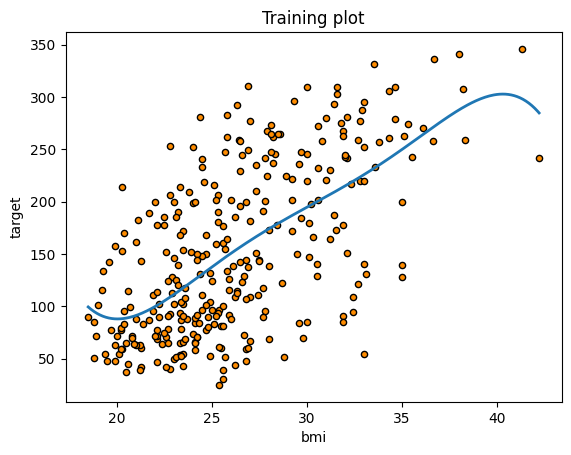

In [639]:
plot_model(X_train_reshaped, y_train, model_5)
plt.title("Training plot")

Text(0.5, 1.0, 'Validate Plot')

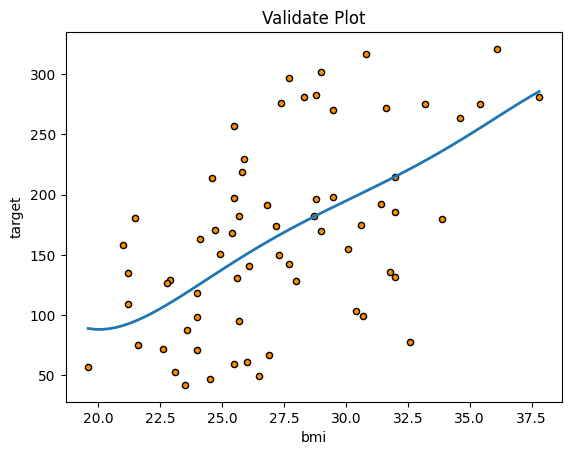

In [640]:
plot_model(X_validate_reshaped, y_validate, model_5)
plt.title("Validate Plot")

#### Formula:

In [641]:
m = model_5['linear'].coef_
c = model_5['linear'].intercept_

m = np.round(m,2)
c = np.round(c,2)

y = f' y = {m[0]}x^0 + {m[1]}x^1 + {m[2]}x^2 + {m[3]}x^3 + {m[4]}x^4 + {m[5]}x^5 + {c}'

print(y)


 y = 0.0x^0 + -2160.58x^1 + 149.57x^2 + -5.08x^3 + 0.09x^4 + -0.0x^5 + 12294.4


In [642]:
result = (-2160.58 *(32.1)) + (149.57 * (32.1**2)) + ((-5.08)*(32.1**3)) + (0.09*(32.1**4)) + ((-0.0)*(32.1**5)) + 12294.4
result

model_5.predict(X = [[32.1]])


array([216.14137061])

#### 7.3 Trainable parameters:

In [643]:
model_5[:-1].get_feature_names_out() 

array(['1', 'x0', 'x0^2', 'x0^3', 'x0^4', 'x0^5'], dtype=object)